In [1]:
import numpy as np
import matplotlib.pyplot as plt
import porespy as ps
import cv2

%matplotlib inline

In [95]:
def generate_image(width, height, radiuses, volume_fractions=None):
    image = np.zeros([width, height])
    points = {}
    for i, r in enumerate(radiuses):
        if volume_fractions is None:
            vf = 1
        else:
            vf = volume_fractions[i]
        image = ps.generators.RSA(im=image, radius=r, volume_fraction=vf)
        for x, y in zip(*np.where(image == 2)):
            if (x, y) not in points:
                points[(x, y)] = r
    print('――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――')
    return image, points

def draw_from_points(width, height, points):
    img = np.zeros([width, height])
    for center, radius in points.items():
        img = cv2.circle(img, center, radius, 1, -1)
    volume = (img > 0).mean()
    print('Final volume fraction:', volume)
    return img

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
RSA: Adding spheres of size 90
Volume Fraction 0.1 reached
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
RSA: Adding spheres of size 75
Volume Fraction 0.4 reached
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
RSA: Adding spheres of size 60
No more free spots Volume Fraction 0.617771
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
RSA: Adding spheres of size 45
Volume Fraction 0.7 reached
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Final volume fraction: 0.515103


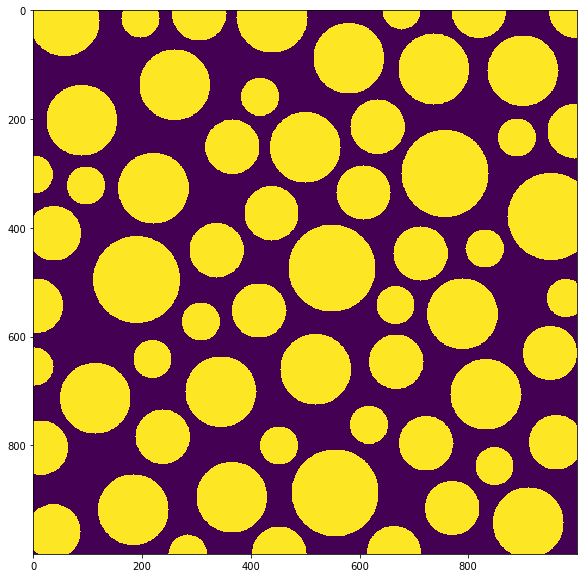

In [100]:
width, height = 1000, 1000
delta = 10
_, pts = generate_image(width, height, radiuses=[90, 75, 60, 45],
                                       volume_fractions=[0.1, 0.4, 0.7, 0.7])
for pt in pts:
    pts[pt] = pts[pt] - delta

plt.figure(figsize=(10, 10))
plt.imshow(draw_from_points(width, height, pts))
plt.show()

In [101]:
pts

{(190, 495): 80,
 (549, 474): 80,
 (555, 887): 80,
 (757, 300): 80,
 (952, 379): 80,
 (57, 19): 65,
 (89, 202): 65,
 (114, 713): 65,
 (184, 918): 65,
 (221, 327): 65,
 (260, 137): 65,
 (345, 701): 65,
 (365, 895): 65,
 (439, 13): 65,
 (500, 252): 65,
 (519, 660): 65,
 (580, 88): 65,
 (736, 108): 65,
 (789, 558): 65,
 (832, 706): 65,
 (900, 111): 65,
 (910, 942): 65,
 (5, 543): 50,
 (14, 804): 50,
 (37, 958): 50,
 (38, 410): 50,
 (238, 784): 50,
 (305, 6): 50,
 (337, 441): 50,
 (366, 251): 50,
 (415, 552): 50,
 (438, 373): 50,
 (452, 999): 50,
 (607, 335): 50,
 (633, 214): 50,
 (663, 998): 50,
 (667, 646): 50,
 (712, 447): 50,
 (722, 796): 50,
 (770, 915): 50,
 (819, 1): 50,
 (950, 630): 50,
 (961, 794): 50,
 (995, 222): 50,
 (998, 1): 50,
 (1, 302): 35,
 (2, 655): 35,
 (97, 322): 35,
 (197, 15): 35,
 (219, 641): 35,
 (284, 999): 35,
 (308, 572): 35,
 (417, 159): 35,
 (452, 800): 35,
 (617, 762): 35,
 (666, 542): 35,
 (677, 0): 35,
 (830, 438): 35,
 (848, 838): 35,
 (889, 234): 35,
 (97